### Importing the necessary Libraries

In [2]:
# importing necessary libraries
import string
import pandas as pd
import numpy as np
from collections import Counter # need Counter to count the most repeated words to show it in text pre-processing step
import matplotlib.pyplot as plt # matplotlib to make diagrams and charts

# importig specific libraries from SK learn to train naive bayes and logistic regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from wordcloud import WordCloud

# 1. Loading the Dataset

In [45]:
# Load the agressive dataset
df = pd.read_csv("AgressiveOnly.csv")

# View first few rows
print(df.head())

# Check shape (rows, columns)
print("\nshape of agressive dataset:")
print(df.shape)


   No.                                            Message
0    1  zhha Islam does nothing but freeze the status ...
1    2                       You dont get out much do you
2    3  MaxBlumenthal Campagnebds Blumenthal self prom...
3    4  No silly it isnt ITS UR MOMS and might I say q...
4    5  Yes there is even more rape in Muslim countrie...

shape of agressive dataset:
(118828, 2)


In [4]:
# loading non-agressive dataset
df2 = pd.read_csv("NonAgressiveOnly.csv")

# Check shape (rows, columns)
print(df2.shape)

(118828, 2)


### Checking is there are rows without messages in it

In [5]:
print("Agressive Dataset with no messages")
df.isnull().sum()

Agressive Dataset with no messages


,0
No.,0
Message,21


In [6]:
print("Non agressive datasets with 0 messages")
df2.isnull().sum()

Non agressive datasets with 0 messages


,0
No.,0
Message,50


# 2. Text pre-processing

### Removing the rows without any messages

In [7]:
#This will remove the null values
df = df.dropna(subset=["No.", "Message"])
df2 = df2.dropna(subset=["No.", "Message"])

In [8]:
#There are no null values because we removed it
print("Agressive dataset after apping dropna function")
df.isnull().sum()

Agressive dataset after apping dropna function


,0
No.,0
Message,0


### Converting the messages into lowercase

In [9]:
print("=" * 10, "dataset before covnerting them into lowercase" ,"=" * 10)
df.head()
df2.head()

========== dataset before covnerting them into lowercase ==========


,No.,Message
0,1,Libya casualty report French operations You ...
1,2,Just for the record that IP is blocked for ho...
2,3,Big Brother Australia I see you have partial...
3,4,WikipediaFeatured portal candidatesPortalOrgan...
4,5,wiki cant edit could you make Thai airways s...


In [10]:
#
df["Message"] = df["Message"].str.lower()
df2["Message"] = df2["Message"].str.lower()
print("=" * 10, "dataset after covnerting them into lowercase" ,"=" * 10)
df2.head()

========== dataset after covnerting them into lowercase ==========


,No.,Message
0,1,libya casualty report french operations you ...
1,2,just for the record that ip is blocked for ho...
2,3,big brother australia i see you have partial...
3,4,wikipediafeatured portal candidatesportalorgan...
4,5,wiki cant edit could you make thai airways s...


### Removing puncuation and numbers

In [11]:
cleaned_messages = []

# this loop Iterates through each message and each character, keeping only alphabetic characters and spaces while discarding numbers and punctuation.
for msg in df["Message"]:
    clean_msg = ""
    for ch in msg:
        if ch.isalpha() or ch.isspace():
            clean_msg += ch
    cleaned_messages.append(clean_msg)

df["Message"] = cleaned_messages
df.head()

,No.,Message
0,1,zhha islam does nothing but freeze the status ...
1,2,you dont get out much do you
2,3,maxblumenthal campagnebds blumenthal self prom...
3,4,no silly it isnt its ur moms and might i say q...
4,5,yes there is even more rape in muslim countrie...


In [12]:
cleaned_messages2 = []

# this loop Iterates through each message and each character, keeping only alphabetic characters and spaces while discarding numbers and punctuation.
for msg in df2["Message"]:
    clean_msg2 = ""
    for ch in msg:
        if ch.isalpha() or ch.isspace():
            clean_msg2 += ch
    cleaned_messages2.append(clean_msg2)

df2["Message"] = cleaned_messages2

### Showing the most repeated words in a bar charts in the agressive dataset

In [13]:
all_words = " ".join(df["Message"]).lower().split() # this has all the words from the messages seperated by comma in a list
word_counts = Counter(all_words) # stored in a dictonary of word and their count

common_words = word_counts.most_common(10) # list of tuple with word and it's count
words, counts = zip(*common_words) # separates words and their counts into two tuples | common_words is a list so * unpacks them  | * is called args. it is used to unpack list/tuples

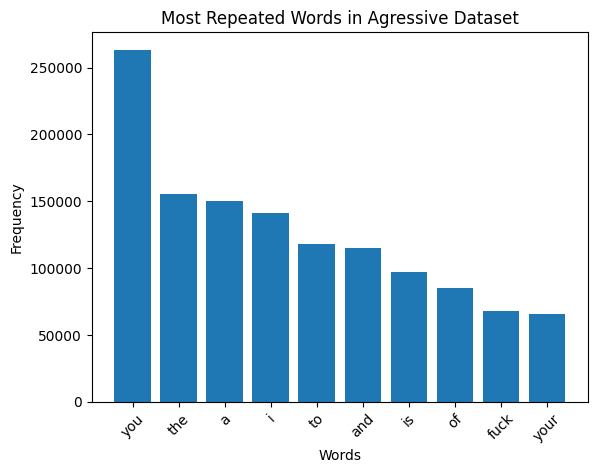

In [14]:
plt.figure()
plt.bar(words, counts)
plt.title("Most Repeated Words in Agressive Dataset")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45) # rotate the bottom words to view it better
plt.show()

### Showing the most repeated words in a bar charts in non-agressive dataset

In [15]:
all_words2 = " ".join(df2["Message"]).lower().split() # this has all the words from the messages seperated by comma in a list
word_counts2 = Counter(all_words2) # stored in a dictonary of word and their count

common_words2 = word_counts2.most_common(10) # list of tuple with word and it's count
words2, counts2 = zip(*common_words2) # separates words and their counts into two tuples | common_words is a list so * unpacks them  | * is called args. it is used to unpack list/tuples

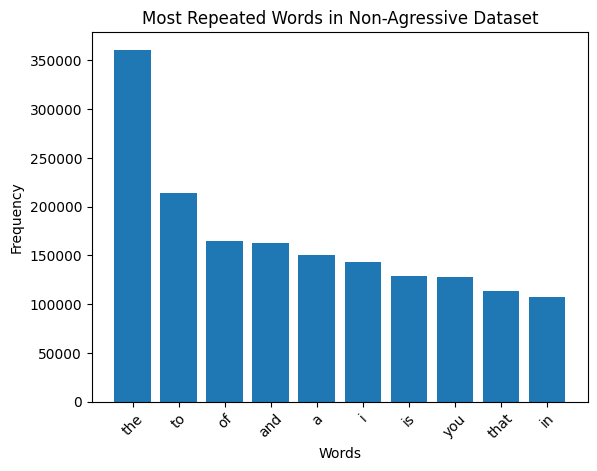

In [16]:
plt.figure()
plt.bar(words2, counts2)
plt.title("Most Repeated Words in Non-Agressive Dataset")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45) # rotate the bottom words to view it better
plt.show()

## Labeling the dataframe

In [17]:
# Add labels to each dataframe
df["label"] = 1  # 1 for aggressive
df2["label"] = 0  # 0 for non-aggressive

### Combining both the agressive dataset and non-agressive dataset into one

In [18]:
# Combine both datasets
combined_df = pd.concat([df, df2], ignore_index=True)

print("DataFrame shape:", combined_df.shape)
print("\nLabel distribution:")
print(combined_df["label"].value_counts())

DataFrame shape: (237585, 3)

Label distribution:
label
1    118807
0    118778
Name: count, dtype: int64


### Splitting the dataset into train set and test set

In [19]:
# Split features and labels
X = combined_df["Message"]
y = combined_df["label"]

In [20]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train and test sets

In [53]:
X_train

,Message
128102,wow dont know what i did unless it was blowing...
10197,dianh exposefalsehood i think you are pretty s...
41671,no lawand order only army court give judgement...
68508,horrible horrible article odd that this arti...
55843,i mean it fuckhead now now i want unblocked now
...,...
119879,this list is not an inclusive one and many peo...
103694,oh yeah you are a masturbate
131932,categoryunit displaydoc hi jimp i saw you we...
146867,i have only one question if some one wants to...


### Displaying the traning set size and test set size

In [21]:
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 190068
Test set size: 47517


### Vectorizing using TF-IDF and removing stop words.

In [22]:
# Now we vectorize the text and train models
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english') # this tokenizes the dataset too
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### Displaying the most repeated words after removing all the stop words

In [23]:
# Get feature (word) names
feature_names = vectorizer.get_feature_names_out()

# Sum TF-IDF values for each word across all training documents
tfidf_sum = np.asarray(X_train_tfidf.sum(axis=0)).flatten()

# Create word–score pairs
word_tfidf = list(zip(feature_names, tfidf_sum))

# Sort words by TF-IDF score (descending)
word_tfidf_sorted = sorted(word_tfidf, key=lambda x: x[1], reverse=True)

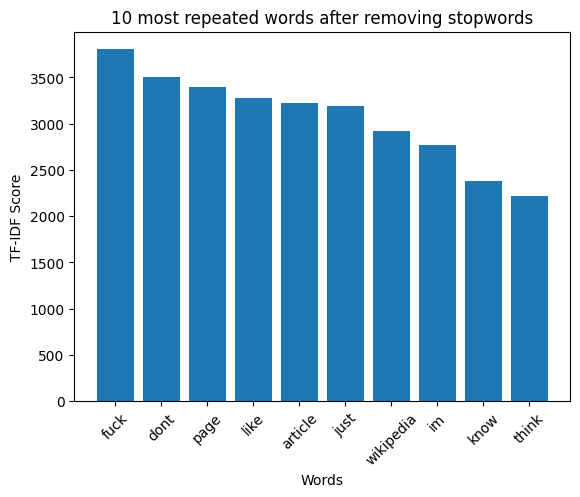

In [24]:
top_words = word_tfidf_sorted[:10]
words, scores = zip(*top_words)

plt.figure()
plt.bar(words, scores)
plt.title("10 most repeated words after removing stopwords")
plt.xlabel("Words")
plt.ylabel("TF-IDF Score")
plt.xticks(rotation=45)
plt.show()

In [25]:
# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)

In [43]:
print("="*50)
print("NAIVE BAYES RESULTS")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb, target_names=['Non-Aggressive', 'Aggressive']))

NAIVE BAYES RESULTS
Accuracy: 0.7576

Classification Report:
                precision    recall  f1-score   support

Non-Aggressive       0.85      0.81      0.83     23882
    Aggressive       0.82      0.85      0.83     23635

      accuracy                           0.83     47517
     macro avg       0.83      0.83      0.83     47517
  weighted avg       0.83      0.83      0.83     47517



In [27]:
# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)

In [44]:
print("\n" + "="*50)
print("LOGISTIC REGRESSION RESULTS")
print("="*50)
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Non-Aggressive', 'Aggressive']))


LOGISTIC REGRESSION RESULTS
Accuracy: 0.8613

Classification Report:
                precision    recall  f1-score   support

Non-Aggressive       0.85      0.89      0.87     23882
    Aggressive       0.88      0.84      0.86     23635

      accuracy                           0.86     47517
     macro avg       0.86      0.86      0.86     47517
  weighted avg       0.86      0.86      0.86     47517



In [29]:
# Confusion Matrices
from sklearn.metrics import confusion_matrix

In [30]:
# Naive Bayes confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("\n" + "="*50)
print("NAIVE BAYES CONFUSION MATRIX")
print("="*50)
print(cm_nb)
print(f"True Negatives: {cm_nb[0,0]}")
print(f"False Positives: {cm_nb[0,1]}")
print(f"False Negatives: {cm_nb[1,0]}")
print(f"True Positives: {cm_nb[1,1]}")


NAIVE BAYES CONFUSION MATRIX
[[19383  4499]
 [ 3496 20139]]
True Negatives: 19383
False Positives: 4499
False Negatives: 3496
True Positives: 20139


In [31]:
# Logistic Regression confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\n" + "="*50)
print("LOGISTIC REGRESSION CONFUSION MATRIX")
print("="*50)
print(cm_lr)
print(f"True Negatives: {cm_lr[0,0]}")
print(f"False Positives: {cm_lr[0,1]}")
print(f"False Negatives: {cm_lr[1,0]}")
print(f"True Positives: {cm_lr[1,1]}")


LOGISTIC REGRESSION CONFUSION MATRIX
[[21162  2720]
 [ 3872 19763]]
True Negatives: 21162
False Positives: 2720
False Negatives: 3872
True Positives: 19763


### Confusion Matrix for Naive Bayes


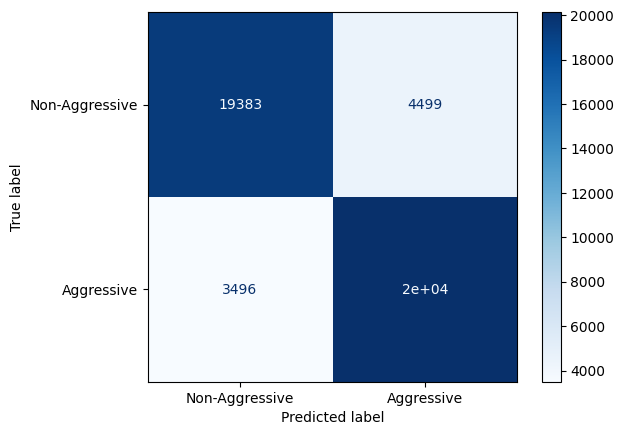

In [32]:
# Naive Bayes
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_nb,
    display_labels=["Non-Aggressive", "Aggressive"],
    cmap="Blues"
)

### Confusion Matrix for Logistic Regression

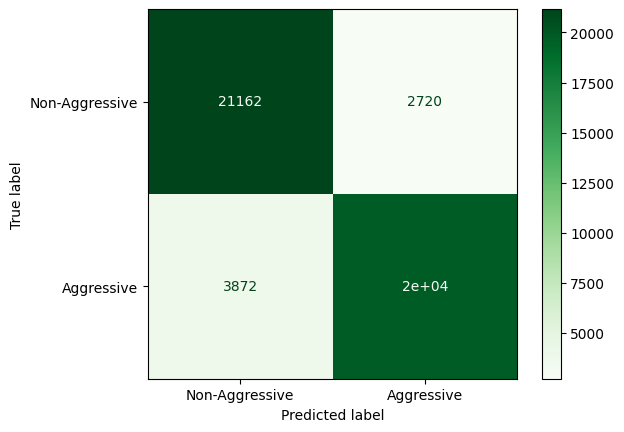

In [33]:
# Logistic Regression
ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred_lr,
    display_labels=["Non-Aggressive", "Aggressive"],
    cmap="Greens"
)

### Precision Recall Curve

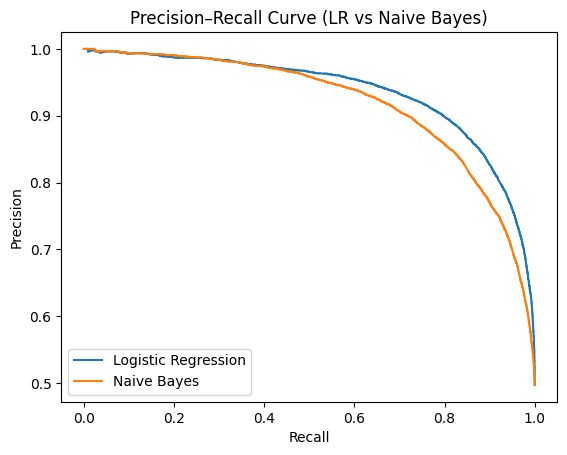

In [34]:
from sklearn.metrics import precision_recall_curve

# Get prediction probabilities
y_scores_lr = lr_model.predict_proba(X_test_tfidf)[:, 1]
y_scores_nb = nb_model.predict_proba(X_test_tfidf)[:, 1]

# Compute precision-recall values
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_scores_lr)
precision_nb, recall_nb, _ = precision_recall_curve(y_test, y_scores_nb)

# Plot both curves
plt.figure()
plt.plot(recall_lr, precision_lr, label="Logistic Regression")
plt.plot(recall_nb, precision_nb, label="Naive Bayes")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (LR vs Naive Bayes)")
plt.legend()
plt.show()

### ROC CURVE (Logistic Regression)

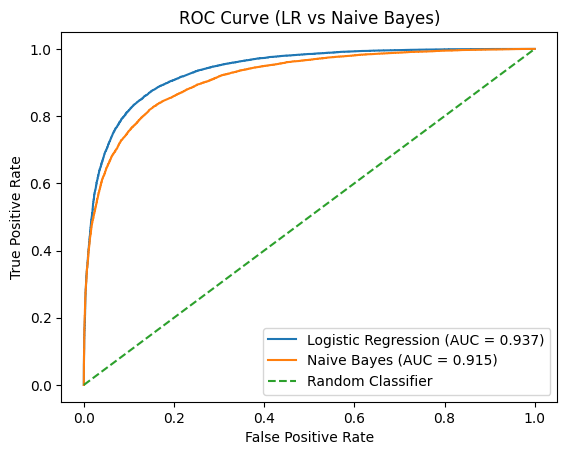

In [38]:
# Get prediction probabilities
y_scores_lr = lr_model.predict_proba(X_test_tfidf)[:, 1]
y_scores_nb = nb_model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC values
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_scores_nb)

# Compute AUC scores
auc_lr = auc(fpr_lr, tpr_lr)
auc_nb = auc(fpr_nb, tpr_nb)

# Plot both ROC curves
plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.3f})")

# Random classifier reference line
plt.plot([0, 1], [0, 1], linestyle="--", label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (LR vs Naive Bayes)")
plt.legend()
plt.show()


### Word Cloud


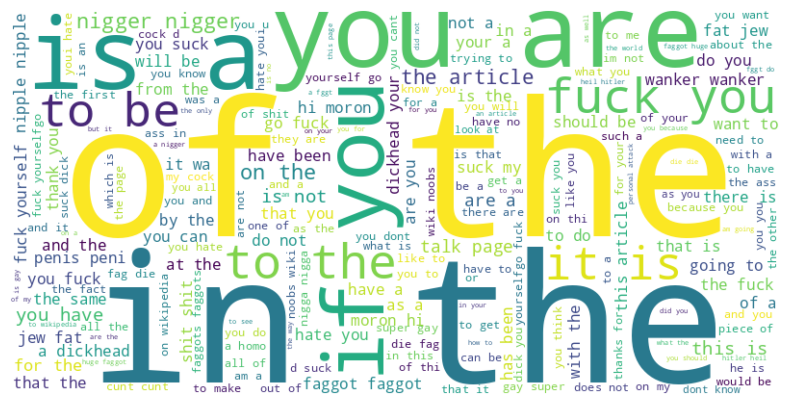

In [36]:
from wordcloud import WordCloud

# Combine all cleaned messages
text = " ".join(combined_df["Message"])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    stopwords="english"
).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


### Prediction through user's input

In [37]:
# Input a message from the user
user_input = input("Enter a message: ")

# Transform the message using the trained TF-IDF vectorizer
message_tfidf = vectorizer.transform([user_input])

# Predict using the trained model (choose nb_model or lr_model)
prediction = nb_model.predict(message_tfidf)[0]  # or lr_model

# Display result
if prediction == 1:
    print("Prediction: Cyberbullying")
else:
    print("Prediction: Not Cyberbullying")

Enter a message: i hate you
Prediction: Cyberbullying
